In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler



## Train Data

In [3]:
train_df = pd.read_csv("C:\\Users\\hp\\Downloads\\train_ctrUa4K.csv")
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Preprocessing

In [7]:
dup_row = train_df.duplicated()
dup_row.sum()

0

In [8]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
num_df = train_df.select_dtypes(include="number")
cat_df = train_df.select_dtypes(include="object_")

In [10]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns are
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [12]:
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [13]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [14]:
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [15]:
train_df = pd.concat([num_df, cat_df], axis=1)

In [16]:
train_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking Outliers

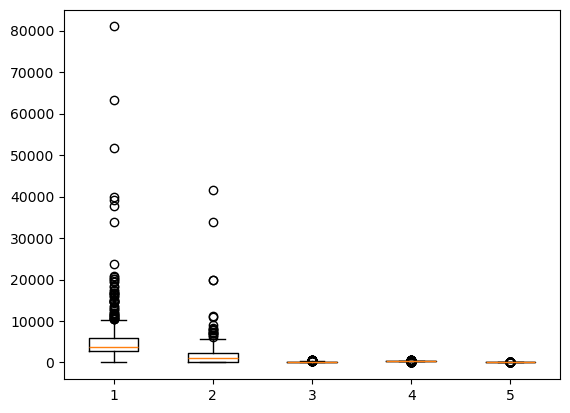

In [18]:
plt.boxplot(num_df)
plt.show()

In [19]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upperbound = q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upperbound)
    df[column_name] = df[column_name].clip(lower=lowerbound)
    return df[column_name]
    



In [20]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)


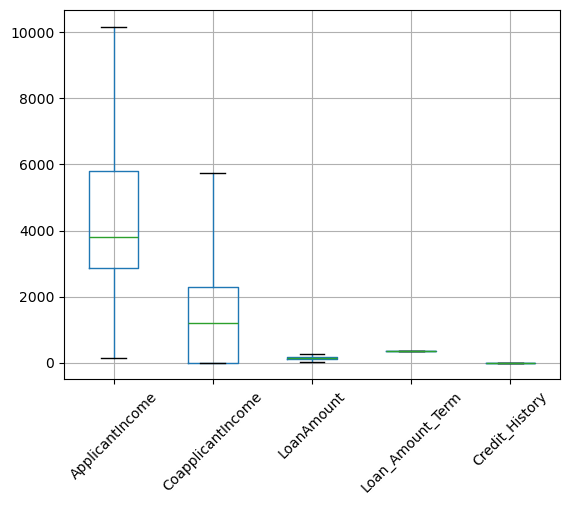

In [21]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [22]:
train_df = pd.concat([num_df, cat_df], axis=1)

### Encoding And Scaling

In [24]:
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y


### Label Encoding

In [26]:
lab_enc = LabelEncoder()
train_df["Gender_encoded"] = lab_enc.fit_transform(train_df["Gender"])
train_df

#Male = 1, Female = 0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Gender_encoded
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y,1
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N,1
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,1
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,1
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,1
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y,1
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y,1


In [27]:
lab_enc=LabelEncoder()
train_df["Married_encoded"]=lab_enc.fit_transform(train_df["Married"])
train_df

#Married-Yes=1, No=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Gender_encoded,Married_encoded
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y,1,0
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N,1,1
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,1,1
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,1,1
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y,0,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,1,1
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y,1,1
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y,1,1


In [28]:
lab_enc=LabelEncoder()
train_df["Self_Employed_encoded"]=lab_enc.fit_transform(train_df["Self_Employed"])
train_df

#SElfEmployed-Yes=1, No=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Gender_encoded,Married_encoded,Self_Employed_encoded
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y,1,0,0
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N,1,1,0
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,1,1,1
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,1,1,0
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y,0,0,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,1,1,0
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y,1,1,0
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y,1,1,0


In [29]:
lab_enc=LabelEncoder()
train_df["No_Graduation_encoded"]=lab_enc.fit_transform(train_df["Education"])
train_df

#Graduate=0, not graduate=1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y,1,0,0,0
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N,1,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,1,1,1,0
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,1,1,0,1
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y,0,0,0,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,1,1,0,0
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y,1,1,0,0
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y,1,1,0,0


In [30]:
lab_enc=LabelEncoder()
train_df["Loan_Status_encoded"]=lab_enc.fit_transform(train_df["Loan_Status"])
lab_enc=LabelEncoder()
train_df["Dependents_encoded"]=lab_enc.fit_transform(train_df["Dependents"])

train_df

#Y=1, N=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Loan_Status_encoded,Dependents_encoded
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y,1,0,0,0,1,0
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N,1,1,0,0,0,1
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,1,1,1,0,1,0
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,1,1,0,1,1,0
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,Rural,Y,0,0,0,0,1,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,1,1,0,0,1,3
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,Urban,Y,1,1,0,0,1,1
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,Urban,Y,1,1,0,0,1,2


In [31]:
train_df=train_df.drop(columns=["Gender","Married","Self_Employed","Education","Loan_Status", "Dependents"])
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Property_Area,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Loan_Status_encoded,Dependents_encoded
0,5849.0,0.0,128.0,360.0,1.0,LP001002,Urban,1,0,0,0,1,0
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,Rural,1,1,0,0,0,1
2,3000.0,0.0,66.0,360.0,1.0,LP001005,Urban,1,1,1,0,1,0
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,Urban,1,1,0,1,1,0
4,6000.0,0.0,141.0,360.0,1.0,LP001008,Urban,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,Rural,0,0,0,0,1,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,Rural,1,1,0,0,1,3
611,8072.0,240.0,253.0,360.0,1.0,LP002983,Urban,1,1,0,0,1,1
612,7583.0,0.0,187.0,360.0,1.0,LP002984,Urban,1,1,0,0,1,2


### OneHotEncoding

In [33]:
train_df = pd.get_dummies(train_df,columns=["Property_Area"], prefix="Prop_Area", dtype=int)
train_df


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Loan_Status_encoded,Dependents_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,LP001002,1,0,0,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,LP001003,1,1,0,0,0,1,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,LP001005,1,1,1,0,1,0,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,LP001006,1,1,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,LP001008,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,LP002978,0,0,0,0,1,0,1,0,0
610,4106.0,0.0,40.0,360.0,1.0,LP002979,1,1,0,0,1,3,1,0,0
611,8072.0,240.0,253.0,360.0,1.0,LP002983,1,1,0,0,1,1,0,0,1
612,7583.0,0.0,187.0,360.0,1.0,LP002984,1,1,0,0,1,2,0,0,1


In [34]:
#LOANID NOT ENCODED
 # not necessary feature for prediction-we cannot predict the outcome with LOAN ID that is a common number for
# each

In [35]:
train_df = train_df.drop(columns=["Loan_ID"])
train_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Loan_Status_encoded,Dependents_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban
0,5849.0,0.0,128.0,360.0,1.0,1,0,0,0,1,0,0,0,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,0,0,1,1,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,1,0,0,0,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,1,0,0,0,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,0,0,0,1,0,1,0,0
610,4106.0,0.0,40.0,360.0,1.0,1,1,0,0,1,3,1,0,0
611,8072.0,240.0,253.0,360.0,1.0,1,1,0,0,1,1,0,0,1
612,7583.0,0.0,187.0,360.0,1.0,1,1,0,0,1,2,0,0,1


### Scaling

In [37]:
std_scaler = StandardScaler()
train_df["Loan_Amount_Term_Scaled"] = std_scaler.fit_transform(train_df[["Loan_Amount_Term"]])
train_df
minmax_scaler = MinMaxScaler()
train_df["ApplicantIncome_scaled"] = minmax_scaler.fit_transform(train_df[["ApplicantIncome"]])
train_df["CoapplicantIncome_scaled"] = minmax_scaler.fit_transform(train_df[["CoapplicantIncome"]])
train_df["LoanAmount_scaled"] = minmax_scaler.fit_transform(train_df[["LoanAmount"]])
train_df["Dependents_scaled"] = minmax_scaler.fit_transform(train_df[["Dependents_encoded"]])
train_df
train_df = train_df.drop(columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Dependents_encoded"])
train_df

,Credit_History,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Loan_Status_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban,Loan_Amount_Term_Scaled,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,Dependents_scaled
0,1.0,1,0,0,0,1,0,0,1,0.0,0.568692,0.000000,0.471287,0.000000
1,1.0,1,1,0,0,0,1,0,0,0.0,0.442360,0.262575,0.471287,0.333333
2,1.0,1,1,1,0,1,0,0,1,0.0,0.284396,0.000000,0.225743,0.000000
3,1.0,1,1,0,1,1,0,0,1,0.0,0.242784,0.410578,0.439604,0.000000
4,1.0,1,0,0,0,1,0,0,1,0.0,0.583760,0.000000,0.522772,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,1,1,0,0,0.0,0.274417,0.000000,0.245545,0.000000
610,1.0,1,1,0,0,1,1,0,0,0.0,0.394761,0.000000,0.122772,1.000000
611,1.0,1,1,0,0,1,0,0,1,0.0,0.790520,0.041789,0.966337,0.333333
612,1.0,1,1,0,0,1,0,0,1,0.0,0.741724,0.000000,0.704950,0.666667


In [38]:
train_df
## FINAL

,Credit_History,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Loan_Status_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban,Loan_Amount_Term_Scaled,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,Dependents_scaled
0,1.0,1,0,0,0,1,0,0,1,0.0,0.568692,0.000000,0.471287,0.000000
1,1.0,1,1,0,0,0,1,0,0,0.0,0.442360,0.262575,0.471287,0.333333
2,1.0,1,1,1,0,1,0,0,1,0.0,0.284396,0.000000,0.225743,0.000000
3,1.0,1,1,0,1,1,0,0,1,0.0,0.242784,0.410578,0.439604,0.000000
4,1.0,1,0,0,0,1,0,0,1,0.0,0.583760,0.000000,0.522772,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,1,1,0,0,0.0,0.274417,0.000000,0.245545,0.000000
610,1.0,1,1,0,0,1,1,0,0,0.0,0.394761,0.000000,0.122772,1.000000
611,1.0,1,1,0,0,1,0,0,1,0.0,0.790520,0.041789,0.966337,0.333333
612,1.0,1,1,0,0,1,0,0,1,0.0,0.741724,0.000000,0.704950,0.666667


# Test Data

In [40]:
test_df = pd.read_csv("C:\\Users\\hp\\Downloads\\test_lAUu6dG.csv")
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [42]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [43]:
dup_row = test_df.duplicated()
dup_row.sum()

0

In [44]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
num_df = test_df.select_dtypes(include="number")
cat_df = test_df.select_dtypes(include="object_")

In [46]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns are
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [47]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [48]:
num_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [49]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])
    

In [50]:
cat_df.isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [51]:
test_df = pd.concat([num_df, cat_df], axis=1)

In [52]:
test_df.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
dtype: int64

### Handling Outliers

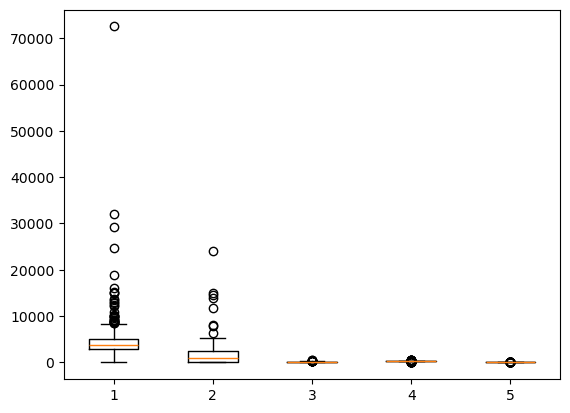

In [54]:
plt.boxplot(num_df)
plt.show()

In [55]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upperbound = q3 + 1.5*iqr
    lowerbound = q1 - 1.5*iqr
    df[column_name] = df[column_name].clip(upper=upperbound)
    df[column_name] = df[column_name].clip(lower=lowerbound)
    return df[column_name]

In [56]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

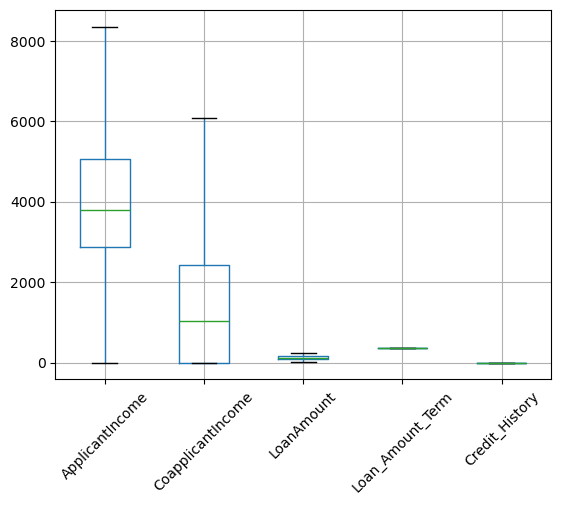

In [57]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

### Encoding and Scaling

### Label encoding

In [60]:
lab_enc = LabelEncoder()
test_df["Gender_encoded"] = lab_enc.fit_transform(test_df["Gender"])
test_df

#Male = 1, Female = 0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_encoded
0,5720,0,110.0,360.0,1.0,LP001015,Male,Yes,0,Graduate,No,Urban,1
1,3076,1500,126.0,360.0,1.0,LP001022,Male,Yes,1,Graduate,No,Urban,1
2,5000,1800,208.0,360.0,1.0,LP001031,Male,Yes,2,Graduate,No,Urban,1
3,2340,2546,100.0,360.0,1.0,LP001035,Male,Yes,2,Graduate,No,Urban,1
4,3276,0,78.0,360.0,1.0,LP001051,Male,No,0,Not Graduate,No,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,1
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban,1
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban,1
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural,1


In [61]:
lab_enc=LabelEncoder()
test_df["Married_encoded"]=lab_enc.fit_transform(test_df["Married"])
test_df

#Married-Yes=1, No=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_encoded,Married_encoded
0,5720,0,110.0,360.0,1.0,LP001015,Male,Yes,0,Graduate,No,Urban,1,1
1,3076,1500,126.0,360.0,1.0,LP001022,Male,Yes,1,Graduate,No,Urban,1,1
2,5000,1800,208.0,360.0,1.0,LP001031,Male,Yes,2,Graduate,No,Urban,1,1
3,2340,2546,100.0,360.0,1.0,LP001035,Male,Yes,2,Graduate,No,Urban,1,1
4,3276,0,78.0,360.0,1.0,LP001051,Male,No,0,Not Graduate,No,Urban,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,1,1
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban,1,1
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban,1,0
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural,1,1


In [62]:
lab_enc=LabelEncoder()
test_df["Self_Employed_encoded"]=lab_enc.fit_transform(test_df["Self_Employed"])
test_df

#SElfEmployed-Yes=1, No=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_encoded,Married_encoded,Self_Employed_encoded
0,5720,0,110.0,360.0,1.0,LP001015,Male,Yes,0,Graduate,No,Urban,1,1,0
1,3076,1500,126.0,360.0,1.0,LP001022,Male,Yes,1,Graduate,No,Urban,1,1,0
2,5000,1800,208.0,360.0,1.0,LP001031,Male,Yes,2,Graduate,No,Urban,1,1,0
3,2340,2546,100.0,360.0,1.0,LP001035,Male,Yes,2,Graduate,No,Urban,1,1,0
4,3276,0,78.0,360.0,1.0,LP001051,Male,No,0,Not Graduate,No,Urban,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,1,1,1
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban,1,1,0
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban,1,0,0
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural,1,1,0


In [63]:
lab_enc=LabelEncoder()
test_df["No_Graduation_encoded"]=lab_enc.fit_transform(test_df["Education"])
test_df

#Graduate=0, not graduate=1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded
0,5720,0,110.0,360.0,1.0,LP001015,Male,Yes,0,Graduate,No,Urban,1,1,0,0
1,3076,1500,126.0,360.0,1.0,LP001022,Male,Yes,1,Graduate,No,Urban,1,1,0,0
2,5000,1800,208.0,360.0,1.0,LP001031,Male,Yes,2,Graduate,No,Urban,1,1,0,0
3,2340,2546,100.0,360.0,1.0,LP001035,Male,Yes,2,Graduate,No,Urban,1,1,0,0
4,3276,0,78.0,360.0,1.0,LP001051,Male,No,0,Not Graduate,No,Urban,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,1,1,1,1
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban,1,1,0,0
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban,1,0,0,0
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural,1,1,0,0


In [64]:
lab_enc=LabelEncoder()
test_df["Dependents_encoded"]=lab_enc.fit_transform(test_df["Dependents"])

test_df

#Y=1, N=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Dependents_encoded
0,5720,0,110.0,360.0,1.0,LP001015,Male,Yes,0,Graduate,No,Urban,1,1,0,0,0
1,3076,1500,126.0,360.0,1.0,LP001022,Male,Yes,1,Graduate,No,Urban,1,1,0,0,1
2,5000,1800,208.0,360.0,1.0,LP001031,Male,Yes,2,Graduate,No,Urban,1,1,0,0,2
3,2340,2546,100.0,360.0,1.0,LP001035,Male,Yes,2,Graduate,No,Urban,1,1,0,0,2
4,3276,0,78.0,360.0,1.0,LP001051,Male,No,0,Not Graduate,No,Urban,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,1,1,1,1,3
363,4158,709,115.0,360.0,1.0,LP002975,Male,Yes,0,Graduate,No,Urban,1,1,0,0,0
364,3250,1993,126.0,360.0,1.0,LP002980,Male,No,0,Graduate,No,Semiurban,1,0,0,0,0
365,5000,2393,158.0,360.0,1.0,LP002986,Male,Yes,0,Graduate,No,Rural,1,1,0,0,0


In [65]:
test_df = test_df.drop(columns=["Gender","Married","Self_Employed","Education", "Dependents"])
test_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Property_Area,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Dependents_encoded
0,5720,0,110.0,360.0,1.0,LP001015,Urban,1,1,0,0,0
1,3076,1500,126.0,360.0,1.0,LP001022,Urban,1,1,0,0,1
2,5000,1800,208.0,360.0,1.0,LP001031,Urban,1,1,0,0,2
3,2340,2546,100.0,360.0,1.0,LP001035,Urban,1,1,0,0,2
4,3276,0,78.0,360.0,1.0,LP001051,Urban,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,Urban,1,1,1,1,3
363,4158,709,115.0,360.0,1.0,LP002975,Urban,1,1,0,0,0
364,3250,1993,126.0,360.0,1.0,LP002980,Semiurban,1,0,0,0,0
365,5000,2393,158.0,360.0,1.0,LP002986,Rural,1,1,0,0,0


### One Hot Encoding

In [67]:
test_df = pd.get_dummies(test_df,columns=["Property_Area"], prefix="Prop_Area", dtype=int)
test_df


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Dependents_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban
0,5720,0,110.0,360.0,1.0,LP001015,1,1,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,LP001022,1,1,0,0,1,0,0,1
2,5000,1800,208.0,360.0,1.0,LP001031,1,1,0,0,2,0,0,1
3,2340,2546,100.0,360.0,1.0,LP001035,1,1,0,0,2,0,0,1
4,3276,0,78.0,360.0,1.0,LP001051,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,LP002971,1,1,1,1,3,0,0,1
363,4158,709,115.0,360.0,1.0,LP002975,1,1,0,0,0,0,0,1
364,3250,1993,126.0,360.0,1.0,LP002980,1,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.0,LP002986,1,1,0,0,0,1,0,0


In [68]:
#LOANID NOT ENCODED
 # not necessary feature for prediction-we cannot predict the outcome with LOAN ID that is a common number for
# each

In [69]:
test_df = test_df.drop(columns=["Loan_ID"])
test_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Dependents_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,0,0,1,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,0,2,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,0,2,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,1,1,1,1,3,0,0,1
363,4158,709,115.0,360.0,1.0,1,1,0,0,0,0,0,1
364,3250,1993,126.0,360.0,1.0,1,0,0,0,0,0,1,0
365,5000,2393,158.0,360.0,1.0,1,1,0,0,0,1,0,0


### Scaling

In [71]:
std_scaler = StandardScaler()
test_df["Loan_Amount_Term_Scaled"] = std_scaler.fit_transform(test_df[["Loan_Amount_Term"]])
test_df
minmax_scaler = MinMaxScaler()
test_df["ApplicantIncome_scaled"] = minmax_scaler.fit_transform(test_df[["ApplicantIncome"]])
test_df["CoapplicantIncome_scaled"] = minmax_scaler.fit_transform(test_df[["CoapplicantIncome"]])
test_df["LoanAmount_scaled"] = minmax_scaler.fit_transform(test_df[["LoanAmount"]])
test_df["Dependents_scaled"] = minmax_scaler.fit_transform(test_df[["Dependents_encoded"]])
test_df
test_df = test_df.drop(columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Dependents_encoded"])
test_df

,Credit_History,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban,Loan_Amount_Term_Scaled,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,Dependents_scaled
0,1.0,1,1,0,0,0,0,1,0.266022,0.078865,0.000000,0.157088,0.000000
1,1.0,1,1,0,0,0,0,1,0.266022,0.042411,0.062500,0.187739,0.333333
2,1.0,1,1,0,0,0,0,1,0.266022,0.068938,0.075000,0.344828,0.666667
3,1.0,1,1,0,0,0,0,1,0.266022,0.032263,0.106083,0.137931,0.666667
4,1.0,1,0,0,1,0,0,1,0.266022,0.045168,0.000000,0.095785,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,1,1,1,0,0,1,0.266022,0.055274,0.074042,0.162835,1.000000
363,1.0,1,1,0,0,0,0,1,0.266022,0.057329,0.029542,0.166667,0.000000
364,1.0,1,0,0,0,0,1,0,0.266022,0.044810,0.083042,0.187739,0.000000
365,1.0,1,1,0,0,1,0,0,0.266022,0.068938,0.099708,0.249042,0.000000


In [72]:
test_df
#FINAL

,Credit_History,Gender_encoded,Married_encoded,Self_Employed_encoded,No_Graduation_encoded,Prop_Area_Rural,Prop_Area_Semiurban,Prop_Area_Urban,Loan_Amount_Term_Scaled,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled,Dependents_scaled
0,1.0,1,1,0,0,0,0,1,0.266022,0.078865,0.000000,0.157088,0.000000
1,1.0,1,1,0,0,0,0,1,0.266022,0.042411,0.062500,0.187739,0.333333
2,1.0,1,1,0,0,0,0,1,0.266022,0.068938,0.075000,0.344828,0.666667
3,1.0,1,1,0,0,0,0,1,0.266022,0.032263,0.106083,0.137931,0.666667
4,1.0,1,0,0,1,0,0,1,0.266022,0.045168,0.000000,0.095785,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,1,1,1,0,0,1,0.266022,0.055274,0.074042,0.162835,1.000000
363,1.0,1,1,0,0,0,0,1,0.266022,0.057329,0.029542,0.166667,0.000000
364,1.0,1,0,0,0,0,1,0,0.266022,0.044810,0.083042,0.187739,0.000000
365,1.0,1,1,0,0,1,0,0,0.266022,0.068938,0.099708,0.249042,0.000000


# Training Model


## Logistic Regression

In [75]:
X_train = train_df.drop(["Loan_Status_encoded"], axis=1)
y_train = train_df["Loan_Status_encoded"]
X_test = test_df.copy()


In [76]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [77]:
print(lr_model.coef_)
print(lr_model.intercept_)

[[ 8.72628047e-05  5.11364670e-02  4.56933939e-01 -1.12669530e-02
  -4.40827011e-01 -2.75129740e-01  4.17763274e-01 -1.42546271e-01
   0.00000000e+00  3.03495208e-01  1.39768827e-01 -8.90778578e-01
  -5.89097193e-02]]
[0.8452059]


In [78]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [79]:
y_test_pred_lr_model = lr_model.predict(X_test)

In [80]:
# print(y_test_pred[:150])
print("Predictions by Logistic Regression model:",y_test_pred_lr_model)
#first 150 predictions 

Predictions by Logistic Regression model: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [82]:
# X_test and x_train, y_train have two different shape 
#no availability of y_test
#we use cross validation method

In [83]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Accuracy of Logistic Regression:", cv_scores.mean())

Accuracy of Logistic Regression: 0.6824203651872585


In [84]:
cv_precision = cross_val_score(lr_model, X_train,y_train,cv=5,scoring="precision_weighted")
cv_recall = cross_val_score(lr_model, X_train, y_train, cv=5, scoring="recall_weighted")
cv_f1 = cross_val_score(lr_model, X_train, y_train, cv=5, scoring = "f1_weighted")
print("Precision of LR:",cv_precision.mean(), "\nRecall:",cv_recall.mean(), "\nF1 Score:",cv_f1.mean())

Precision of LR: 0.6050393241822525 
Recall: 0.6824203651872585 
F1 Score: 0.5784906330405628


### Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb_model=nb_model.predict(X_test)

In [87]:
print(y_pred_nb_model)

[1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [88]:
cv_accuracy = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy:", cv_accuracy.mean())


Accuracy: 0.6416233506597362


In [89]:
cv_precision = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='f1_weighted')
print("Precision of Naive Bayers:", cv_precision.mean())
print("Recall:", cv_recall.mean())
print("F1 Score:", cv_f1.mean())

Precision of Naive Bayers: 0.5988525343026307
Recall: 0.6416233506597362
F1 Score: 0.6058861263640811


### KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train) 
y_pred_knn_model = knn_model.predict(X_test)

In [92]:
print(y_pred_knn_model)

[1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1]


In [93]:
cv_accuracy = cross_val_score(knn_model,X_train, y_train, cv=5, scoring = "accuracy")
print("Accuracy of KNN Model:", cv_accuracy.mean())

Accuracy of KNN Model: 0.6368385978941756


In [94]:
cv_precision=cross_val_score(knn_model,X_train,y_train,cv=5,scoring="precision_weighted")
cv_recall=cross_val_score(knn_model,X_train,y_train, cv=5,scoring="recall_weighted")
cv_f1=cross_val_score(knn_model,X_train, y_train, cv=5, scoring="f1_weighted")
print("Precison of KNN :",cv_precision.mean(),"\nRecall is",cv_recall.mean(),"\nF1 score is",cv_f1.mean())

Precison of KNN : 0.5712801381350447 
Recall is 0.6368385978941756 
F1 score is 0.5856905781354248


### Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
y_pred_dtc_model = dtc_model.predict(X_test)


In [97]:
print(y_pred_dtc_model)

[0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0]


In [98]:
cv_accuracy = cross_val_score(dtc_model, X_train, y_train, cv=5, scoring="accuracy")
print("Accuracy of Decision Tree Classifier Model:", cv_accuracy.mean())

Accuracy of Decision Tree Classifier Model: 0.6042782886845262


In [99]:
cv_precision = cross_val_score(dtc_model, X_train, y_train, cv=5, scoring = "precision_weighted")
cv_recall = cross_val_score(dtc_model, X_train, y_train, cv=5, scoring = "recall_weighted")
cv_f1 = cross_val_score(dtc_model, X_train, y_train, cv=5, scoring = "f1_weighted")
print("Precison of DTC model:", cv_precision.mean(), "\nRecall is:",cv_recall.mean(), "\nFI score:", cv_f1.mean())

Precison of DTC model: 0.5931824032697453 
Recall is: 0.615647074503532 
FI score: 0.5962042349485761


### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred_rfc_model = rfc_model.predict(X_test)

In [102]:
print(y_pred_rfc_model)

[0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0]


In [103]:
cv_accuracy = cross_val_score(rfc_model, X_train, y_train, cv=5, scoring="accuracy")
print("Accuracy of RFC:", cv_accuracy.mean())

Accuracy of RFC: 0.6694122351059575


In [191]:
cv_precision = cross_val_score(rfc_model, X_train, y_train, cv=5, scoring="precision_weighted")
cv_recall = cross_val_score(rfc_model, X_train, y_train, cv=5, scoring="recall_weighted")
cv_f1 = cross_val_score(rfc_model, X_train, y_train, cv=5, scoring="f1_weighted")
print("Precision of RFC:", cv_precision.mean(), "\nRecall is:", cv_recall.mean(), "\nF1 score:", cv_f1.mean())

Precision of RFC: 0.575460078253533 
Recall is: 0.6400639744102359 
F1 score: 0.6052111502093606
